In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [27]:
housing=pd.read_csv('kc_house_data.csv')

In [28]:
housing['bathrooms'] = housing.bathrooms.astype(int)   #converting the bathrom column from floats to integers

In [29]:
prices = housing['price']
features = housing.drop(['price','id','date','lat','long','zipcode'], axis = 1)

In [30]:
housing['price'] = housing['price'].apply(lambda x:5*x)

In [31]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,1109500.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,2690000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,900000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,3020000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,2550000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [33]:
prices.head()

0    1109500.0
1    2690000.0
2     900000.0
3    3020000.0
4    2550000.0
Name: price, dtype: float64

In [34]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int32
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int32(1), int64(15), object(1)
memory usage: 3.4+ MB


In [35]:
housing['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

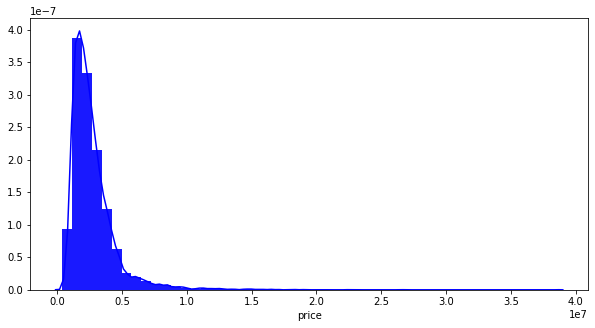

In [36]:
plt.figure(figsize=(10,5))

sns.distplot(housing['price'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

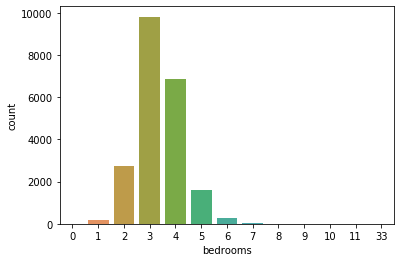

In [37]:
sns.countplot(x='bedrooms',data=housing)

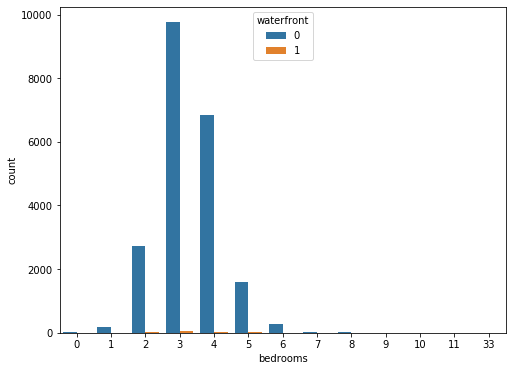

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms',hue='waterfront', data=housing)

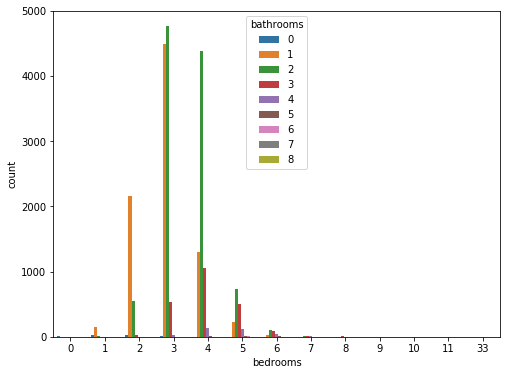

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms',hue='bathrooms', data=housing)

In [40]:
bath = ['bathrooms', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(housing[bath[0]], housing[bath[1]]).style.background_gradient(cmap = cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,,
0,8,31,28,16,3,0,0,0,0,0,0,0,0
1,2,156,2159,4483,1298,225,28,3,0,0,0,0,1
2,3,12,551,4762,4375,727,99,8,4,0,1,0,0
3,0,0,22,541,1053,505,87,11,5,2,1,1,0
4,0,0,0,22,135,119,45,12,2,3,0,0,0
5,0,0,0,0,18,17,9,2,1,0,1,0,0
6,0,0,0,0,0,8,2,1,1,0,0,0,0
7,0,0,0,0,0,0,1,0,0,1,0,0,0
8,0,0,0,0,0,0,1,1,0,0,0,0,0


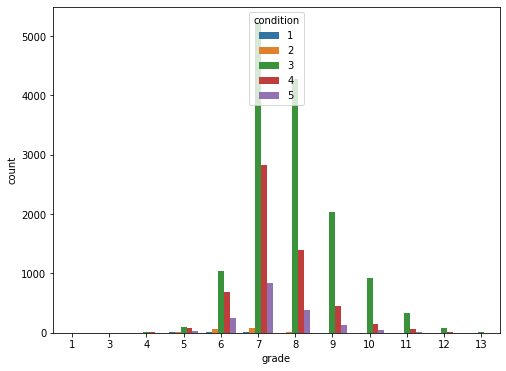

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x='grade',hue='condition', data=housing)

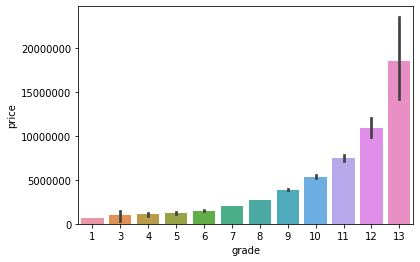

In [42]:
sns.barplot(x='grade', y='price', data=housing)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()

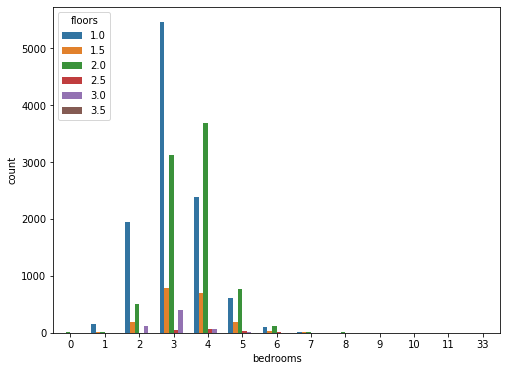

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms',hue='floors', data=housing)

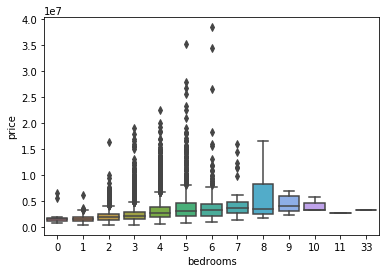

In [44]:
sns.boxplot(x=housing['bedrooms'],y=housing['price'])

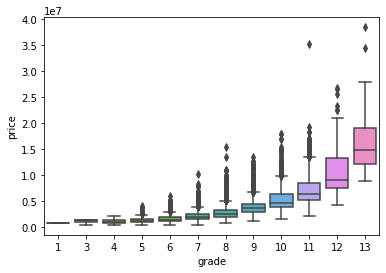

In [45]:
sns.boxplot(x=housing['grade'],y=housing['price'])

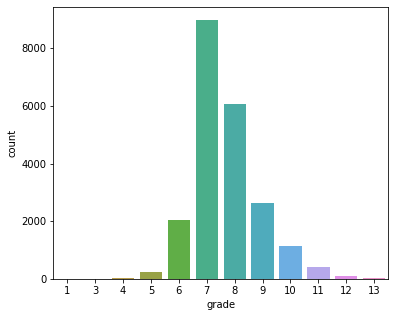

In [46]:
plt.figure(figsize=(6,5))
sns.countplot(x='grade',data=housing)

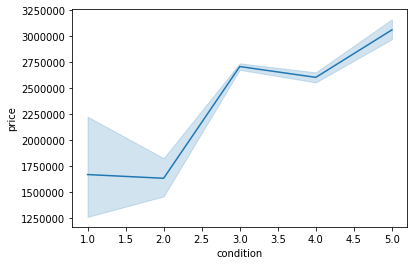

In [51]:
sns.lineplot(y='price', x='condition', data=housing)

In [47]:
#sns.pairplot(housing)

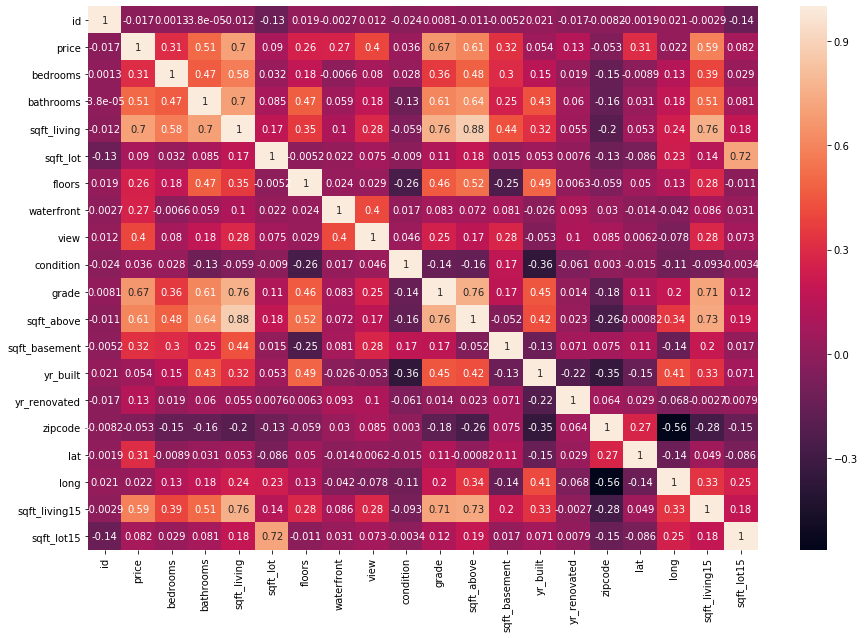

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(housing.corr(), annot=True)

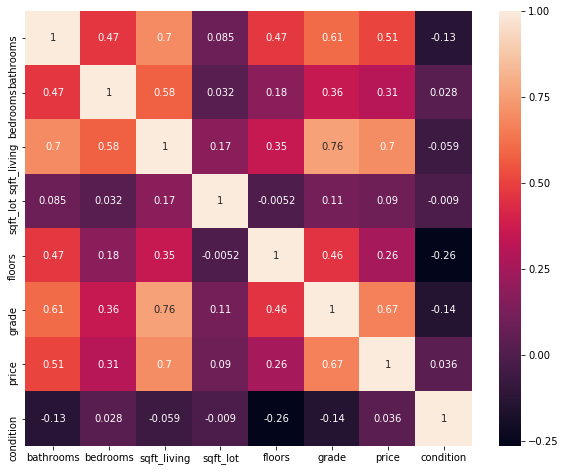

In [49]:
corr = housing[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price','condition']]

plt.figure(figsize=(10,8))
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [50]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)
print("Statistics for Lagos housing dataset:\n")
print("Minimum price: #{:,.2f}".format(minimum_price))
print("Maximum price: #{:,.2f}".format(maximum_price))
print("Mean price: #{:,.2f}".format(mean_price))
print("Median price: #{:,.2f}".format(median_price))
print("Standard deviation of prices: #{:,.2f}".format(std_price))

Statistics for Lagos housing dataset:

Minimum price: #375,000.00
Maximum price: #38,500,000.00
Mean price: #2,700,440.71
Median price: #2,250,000.00
Standard deviation of prices: #1,835,593.52


In [25]:
y=prices

In [26]:
x=features

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
c=ExtraTreesRegressor()
c.fit(x_train,y_train)
c.score(x_test,y_test)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7347061616094338

In [29]:
predictions = c.predict(x_test)
predictions

array([1843725., 2341750., 2916563., ..., 1703000., 1480525., 5930800.])

In [30]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [41]:
client_data = [[3, 1, 1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650], 
               [3, 2, 2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,5650], 
               [2, 1, 770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062],
              [4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000]] 
for i, price in enumerate(c.predict(client_data)):
    print("Predicted selling price for Client {}'s home: #{:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: #1,109,500.00
Predicted selling price for Client 2's home: #2,950,000.00
Predicted selling price for Client 3's home: #900,000.00
Predicted selling price for Client 4's home: #2,860,857.50


In [42]:
prices.head()

0    1109500.0
1    2690000.0
2     900000.0
3    3020000.0
4    2550000.0
Name: price, dtype: float64

In [43]:
test=pd.read_csv('kc_house_data.csv')

In [44]:
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
from sklearn import metrics 

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 607998.3850889369
MSE: 930351678495.5955
RMSE: 964547.3956709413


In [47]:
metrics.explained_variance_score(y_test, predictions)

0.7347333572725506